In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from numpy import unique
from numpy import where

Gaussian Mixture Model algorithm_Clustering:


One of the problems with k-means is that the data needs to follow a circular format. The way k-means calculates the distance between data points has to do with a circular path, so non-circular data isn't clustered correctly.

This is an issue that Gaussian mixture models fix. You don’t need circular shaped data for it to work well.

The Gaussian mixture model uses multiple Gaussian distributions to fit arbitrarily shaped data.

There are several single Gaussian models that act as hidden layers in this hybrid model. So the model calculates the probability that a data point belongs to a specific Gaussian distribution and that's the cluster it will fall under.

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')


In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
#Doing Lable Encoder before split the dataset
columns = ['Genre']
encoder=LabelEncoder()
for i in columns:
    dataset[i] = encoder.fit_transform(dataset[i])

In [7]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [8]:
X = dataset.iloc[:, [3, 4]].values

In [9]:
from sklearn.mixture import GaussianMixture


In [14]:
# Apply the GaussianMixture algorithm
gaussian_model = GaussianMixture(n_components=5)
gaussian_model.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [15]:
# Assign each data point to a cluster
gaussian_pred = gaussian_model.predict(X)

In [16]:
# Get unique clusters
gaussian_clusters = np.unique(gaussian_pred)

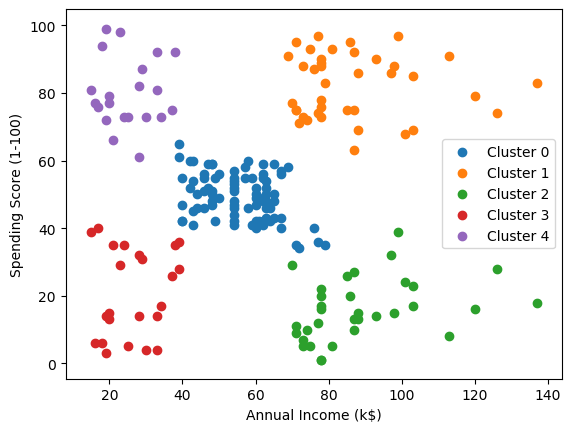

In [17]:
# Plot the BIRCH clusters
for gaussian_cluster in gaussian_clusters:
    # Get indices of data points in this cluster
    indices = where(gaussian_pred == gaussian_cluster)
    # Make the plot
    pyplot.scatter(X[indices, 0], X[indices, 1], label=f'Cluster {gaussian_cluster}')

# Add labels and legend
pyplot.xlabel('Annual Income (k$)')
pyplot.ylabel('Spending Score (1-100)')
pyplot.legend()
pyplot.show()

In [18]:
supervised=pd.DataFrame(dataset)

In [19]:
supervised['Cluster_group']=gaussian_pred

In [20]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,2
197,198,1,32,126,74,1
198,199,1,32,137,18,2


C:\Users\jugip\anaconda3\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


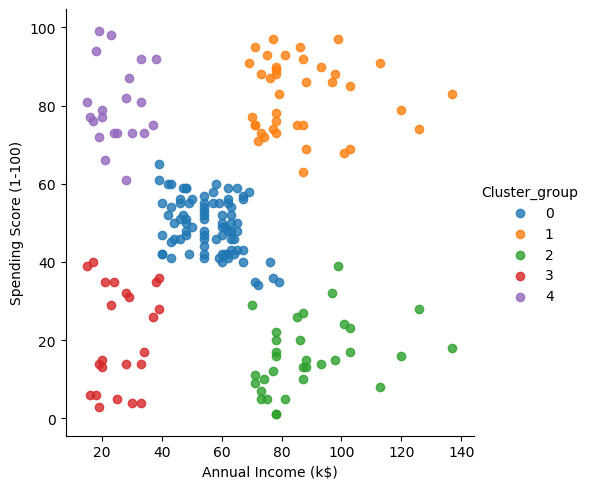

In [21]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False, legend=True, legend_out=True)